# Lending Club Loan Origination Data (2007-2015)

***

## Data Exploration and Evaluation

#### Load the data, select the relevant columns, and perform any necessary cleaning and aggregations to explore and better understand the dataset. Describe any assumptions you made to handle null variables and outliers. Describe the distributions of the features. Include two data visualizations and two summary statistics to support these findings.

Import dependencies.

In [217]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling
import calendar
sns.set_style('whitegrid')
%matplotlib inline

from sklearn.model_selection import cross_val_score, StratifiedKFold, cross_val_predict, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score,accuracy_score,confusion_matrix, f1_score, precision_score, auc,roc_auc_score,roc_curve, precision_recall_curve
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings("ignore")

Load the data.

In [131]:
df = pd.read_csv("loan.csv", low_memory=False)

Check dimensions and preview first 25 rows.

In [132]:
df.shape

(887379, 74)

In [133]:
df.head(25)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.000000,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.000000,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.000000,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.000000,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.000000,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1075269,1311441,5000.0,5000.0,5000.000000,36 months,7.90,156.46,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1069639,1304742,7000.0,7000.0,7000.000000,60 months,15.96,170.08,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1072053,1288686,3000.0,3000.0,3000.000000,36 months,18.64,109.43,E,E1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1071795,1306957,5600.0,5600.0,5600.000000,60 months,21.28,152.39,F,F2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1071570,1306721,5375.0,5375.0,5350.000000,60 months,12.69,121.45,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Select the relevant columns.

In [134]:
df = df[['loan_amnt','funded_amnt', 'term', 'int_rate', 'grade', 'annual_inc', 'issue_d',
'dti', 'revol_bal', 'total_pymnt', 'loan_status']]

In [135]:
df.head()

,loan_amnt,funded_amnt,term,int_rate,grade,annual_inc,issue_d,dti,revol_bal,total_pymnt,loan_status
0,5000.0,5000.0,36 months,10.65,B,24000.0,Dec-2011,27.65,13648.0,5861.071414,Fully Paid
1,2500.0,2500.0,60 months,15.27,C,30000.0,Dec-2011,1.00,1687.0,1008.710000,Charged Off
2,2400.0,2400.0,36 months,15.96,C,12252.0,Dec-2011,8.72,2956.0,3003.653644,Fully Paid
3,10000.0,10000.0,36 months,13.49,C,49200.0,Dec-2011,20.00,5598.0,12226.302212,Fully Paid
4,3000.0,3000.0,60 months,12.69,B,80000.0,Dec-2011,17.94,27783.0,3242.170000,Current


Keep the data dictionary (relevant columns only) present for reference.

In [136]:
description = pd.read_excel('LCDataDictionary.xlsx').dropna()
description = description[description['LoanStatNew'].isin(['loan_amnt','funded_amnt', 'term', 'int_rate', 'grade', 'annual_inc', 'issue_d',
'dti', 'revol_bal', 'total_pymnt', 'loan_status'])]
description.style.set_properties(subset=['Description'], **{'width' :'850px'})

,LoanStatNew,Description
1,annual_inc,The self-reported annual income provided by the borrower during registration.
8,dti,"A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income."
15,funded_amnt,The total amount committed to that loan at that point in time.
17,grade,LC assigned loan grade
23,int_rate,Interest Rate on the loan
25,issue_d,The month which the loan was funded
31,loan_amnt,"The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value."
32,loan_status,Current status of the loan
46,revol_bal,Total credit revolving balance
49,term,The number of payments on the loan. Values are in months and can be either 36 or 60.


Using `pandas_profiling`, we will quickly generate a column-level summary report which automatically detects the following useful characteristics: data types, null values, zeros, skew, cardinality, summary statistics, common values, extreme values, and a (rough) histogram.

This report will be saved to an html file, included in this repository, and includes a distribution and summary statistics for each column.

In [137]:
pandas_profiling.ProfileReport(df, correlation_overrides=['funded_amnt'])

Number of variables,11
Number of observations,887379
Total Missing (%),0.0%
Total size in memory,74.5 MiB
Average record size in memory,88.0 B
Numeric,7
Categorical,4
Boolean,0
Date,0
Text (Unique),0
Rejected,0


Based on the output of the report, there only appear to be null values in the "annual_inc" column, 4 occurrences. Before addressing these null values as well as other maintenance concerns, we can verify there are not other gaps in the data  by generating a heatmap of nulls using ```seaborn```.

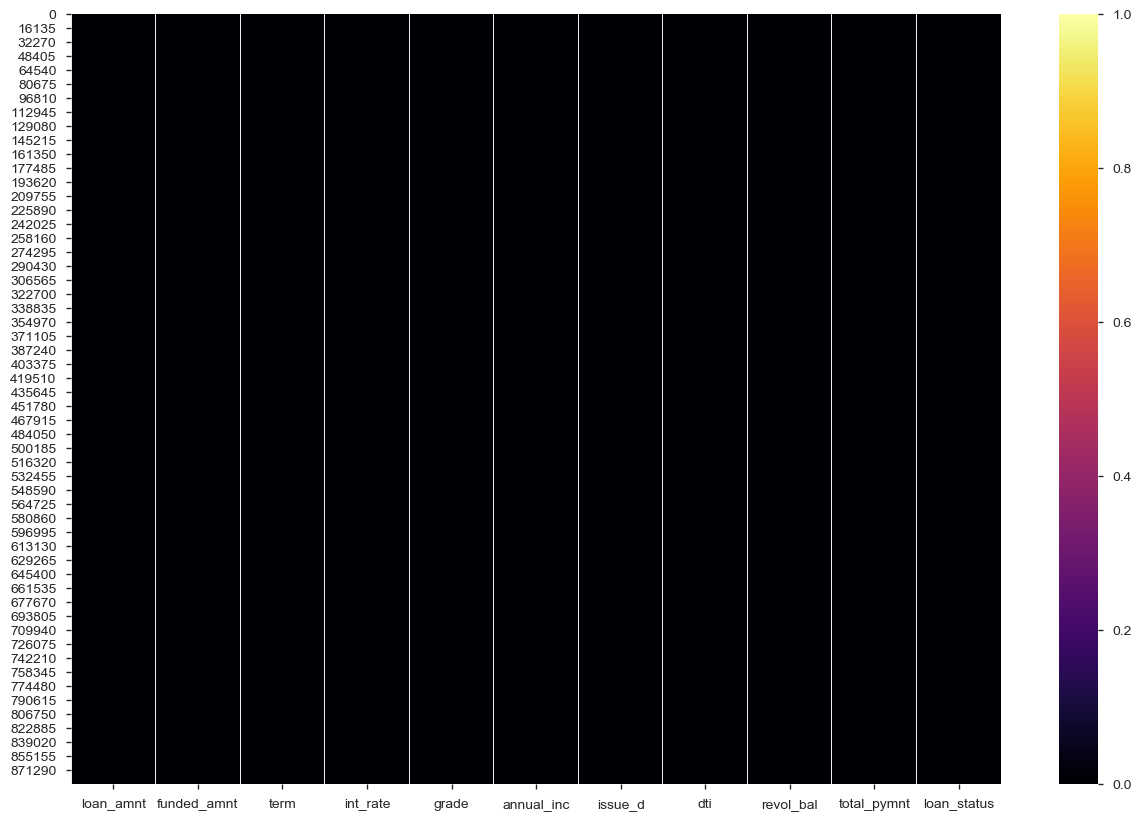

In [138]:
fig = plt.figure(figsize=(15,10))
sns.heatmap(df.isna(), cmap='inferno')

Returning to the ```pandas_profiling``` report, we describe any outliers, null values, or zeros of each column:

1. "annual_inc"
    - There are 2 occurrences of the minimum value of 0. We should confirm this is not a mistake, as zero income should be a red flag on a loan application. We will look at the loan status and grade of these rows.
    - Additionally, four rows are missing values. We will view these.
    - The top 5 maximum values are suspiciously large. We will look at  rows with high values in this column to gather additional context.
2. "dti"
    - 451 (0.1%) of values are zero. We will glance at these rows, but considering "dti" is calculated on the pre-existing debt-to-income ratio (excluding the loan applied for), this seems reasonable.
    - Considering "dti" is a ratio, we should look into rows with unreasonably high values as outliers. In particular, the 2 occurrences of 9999.0 appear to be outliers.
3. "funded_amnt"
    - We notice near perfect correlation between this column and "loan_amnt". This seems reasonable given the nature of the columns.
4. "grade"
    - A categorical variable distributed across buckets A through G. Referring to Lending Club's website confirms that G is the highest risk  note offered, and A is the lowest risk. 
    - We will visualize the relationship between "grade" and "loan_amnt" out of curiosity.
5. "int_rate"
    - There aren't any apparent outliers, zeros, or null values.
    - We will visualize the relationship between "int_rate" and "grade" out of curiosity.
6. "issue_d"
    - From the report we cannot easily tell the consistency and reasonableness of formatting along this column. We will examine all unique values to ensure no junk data is present. Then we will force into a datetime format for later use.
7. "loan_amnt"
    - According to the range of values, all loans have been small (between 500 and 35,000). Nothing else appears unusual - although glancing at how these values are related to time of origination could illuminate a trend in Lending Club's business operations.
8. "loan_status"
    - The integrity of these data is satisfactory, but these buckets will be onerous for further investigation. We will roll buckets into a binary indicator of default or non-default in the Business Analysis section.
9. "revol_bal"
    - Given the definition of revolving credit, the 3402 (0.4%) zero values seem reasonable. We will glance at these rows briefly.
    - The maximum values seem suspiciously large. We will view rows with the highest values to confirm that these values are not mistaken (i.e. applicant has sufficiently high annual income, risk reflects debt load, etc.).
10. "term"
    - There are two unique values in this column, " 36 months" and " 60 months". We will strip the single space from the beginning of all columns.
11. "total_pymnt"
    - We will make a minor adjustment by rounding these dollar values to the nearest cent for consistency. Otherwise appears acceptable.

Rounding all dollar valued columns to the nearest cent.

In [139]:
round_cols = ['loan_amnt', 'funded_amnt', 'annual_inc', 'revol_bal', 'total_pymnt']
df[round_cols] = df[round_cols].round(2)
df.head(10)

,loan_amnt,funded_amnt,term,int_rate,grade,annual_inc,issue_d,dti,revol_bal,total_pymnt,loan_status
0,5000.0,5000.0,36 months,10.65,B,24000.0,Dec-2011,27.65,13648.0,5861.07,Fully Paid
1,2500.0,2500.0,60 months,15.27,C,30000.0,Dec-2011,1.00,1687.0,1008.71,Charged Off
2,2400.0,2400.0,36 months,15.96,C,12252.0,Dec-2011,8.72,2956.0,3003.65,Fully Paid
3,10000.0,10000.0,36 months,13.49,C,49200.0,Dec-2011,20.00,5598.0,12226.30,Fully Paid
4,3000.0,3000.0,60 months,12.69,B,80000.0,Dec-2011,17.94,27783.0,3242.17,Current
5,5000.0,5000.0,36 months,7.90,A,36000.0,Dec-2011,11.20,7963.0,5631.38,Fully Paid
6,7000.0,7000.0,60 months,15.96,C,47004.0,Dec-2011,23.51,17726.0,8136.84,Current
7,3000.0,3000.0,36 months,18.64,E,48000.0,Dec-2011,5.35,8221.0,3938.14,Fully Paid
8,5600.0,5600.0,60 months,21.28,F,40000.0,Dec-2011,5.55,5210.0,646.02,Charged Off
9,5375.0,5375.0,60 months,12.69,B,15000.0,Dec-2011,18.08,9279.0,1476.19,Charged Off


##### "annual_inc" column

Exploring null values in "annual_inc" column. These appear to be early loan applications in which annual income was not provided or not recorded. They were each fully paid, although apparently do not meet the current credit policy. They do not appear to be errors. However, we will drop these for the purposes of later modeling, as coercing to the mean, or to zero would be misrepresenting the data.

In [48]:
null_data = df[df.isnull().any(axis=1)]
null_data

,loan_amnt,funded_amnt,term,int_rate,grade,annual_inc,issue_d,dti,revol_bal,total_pymnt,loan_status
42449,5000.0,5000.0,36 months,7.43,A,NaN,Aug-2007,1.0,0.0,5593.46,Does not meet the credit policy. Status:Fully ...
42450,7000.0,7000.0,36 months,7.75,A,NaN,Aug-2007,1.0,0.0,7867.53,Does not meet the credit policy. Status:Fully ...
42480,6700.0,6700.0,36 months,7.75,A,NaN,Jul-2007,1.0,0.0,7530.42,Does not meet the credit policy. Status:Fully ...
42533,6500.0,6500.0,36 months,8.38,A,NaN,Jun-2007,4.0,0.0,7373.83,Does not meet the credit policy. Status:Fully ...


In [142]:
df = df.dropna(subset = ['annual_inc'])
df[df.isnull().any(axis=1)]

,loan_amnt,funded_amnt,term,int_rate,grade,annual_inc,issue_d,dti,revol_bal,total_pymnt,loan_status


Exploring "annual_inc" zero values. We see that the "grade" might reflect the fact the applicant has zero income, and that the "dti" value likely reflects the fact that a zero value was in the denominator of that calculation. We will leave these values in the data, as they do not appear to be mistakes, nor will they impact our modeling later.

In [143]:
zero_inc = df[df["annual_inc"] == 0]
zero_inc

,loan_amnt,funded_amnt,term,int_rate,grade,annual_inc,issue_d,dti,revol_bal,total_pymnt,loan_status
484446,20000.0,20000.0,36 months,16.99,D,0.0,Dec-2015,9999.0,7161.0,694.08,Current
531886,3700.0,3700.0,36 months,12.59,C,0.0,Nov-2015,9999.0,10649.0,242.70,Current


Looking at the highest annual income values, these do not appear to be mistakes, judging by high grade ratings where debt-to-income is relatively low.

In [144]:
high_inc = df.sort_values("annual_inc", ascending = False)

In [145]:
high_inc.head(100)

,loan_amnt,funded_amnt,term,int_rate,grade,annual_inc,issue_d,dti,revol_bal,total_pymnt,loan_status
697244,24000.0,24000.0,60 months,7.89,A,9500000.0,Jul-2015,0.12,16854.0,2901.76,Current
506740,11000.0,11000.0,36 months,6.89,A,9000000.0,Dec-2015,0.08,14165.0,334.89,Current
684000,10550.0,10550.0,36 months,15.61,D,8900060.0,Jul-2015,0.09,5311.0,1826.10,In Grace Period
866973,8000.0,8000.0,36 months,13.66,C,8706582.0,Jan-2015,0.11,16449.0,1345.37,Charged Off
490862,14000.0,14000.0,60 months,10.64,B,8700000.0,Dec-2015,0.18,12664.0,285.34,Current
514272,12000.0,12000.0,36 months,9.17,B,8500021.0,Nov-2015,0.22,18409.0,373.38,Current
552197,30000.0,30000.0,36 months,12.69,C,8253000.0,Nov-2015,0.14,26402.0,1864.65,Current
594270,5000.0,5000.0,36 months,8.18,B,8121180.0,Oct-2015,0.48,66893.0,466.76,Current
599100,10000.0,10000.0,36 months,6.89,A,7600000.0,Sep-2015,0.09,2494.0,10160.26,Current
325185,15000.0,15000.0,36 months,19.52,E,7500000.0,Aug-2014,0.20,9872.0,8860.80,Current


##### "dti" column

Exploring "dti" zero values, these appear to simply be applicants without prior debt. We will not make any changes here.

Note that the high outliers in "dti" were the same rows with "annual_inc" of zero, and we have decided to keep them. Additionally, it is worth noting that when we normalize numerical values for our model, the high "dti" values will still be reflected, but that is the nature of the dti metric, so it would be reasonable to include it.

In [147]:
zero_dti = df[df["dti"] == 0]
zero_dti

,loan_amnt,funded_amnt,term,int_rate,grade,annual_inc,issue_d,dti,revol_bal,total_pymnt,loan_status
2636,25000.0,25000.0,36 months,7.90,A,200000.0,Nov-2011,0.0,0.0,25634.55,Fully Paid
2945,15000.0,15000.0,36 months,7.51,A,65004.0,Nov-2011,0.0,0.0,16212.25,Fully Paid
3216,3500.0,3500.0,36 months,16.29,D,50000.0,Nov-2011,0.0,0.0,4019.00,Charged Off
4099,6500.0,6500.0,36 months,10.65,B,56650.0,Nov-2011,0.0,0.0,7265.40,Fully Paid
4559,5150.0,5150.0,36 months,7.90,A,68000.0,Nov-2011,0.0,0.0,5800.51,Fully Paid
4573,6000.0,6000.0,36 months,6.03,A,21600.0,Oct-2011,0.0,0.0,6573.82,Fully Paid
5820,1600.0,1600.0,60 months,20.30,E,18000.0,Oct-2011,0.0,0.0,2239.14,Fully Paid
6639,12000.0,12000.0,60 months,9.91,B,40000.0,Oct-2011,0.0,0.0,15025.77,Fully Paid
6883,30000.0,30000.0,60 months,15.96,C,174996.0,Oct-2011,0.0,0.0,38208.96,Fully Paid
7244,25000.0,21075.0,60 months,10.65,B,61000.0,Sep-2011,0.0,0.0,23113.04,Current


##### "grade" column

We will plot the frequency of each grade note, as well as the average loan amount for each grade note.

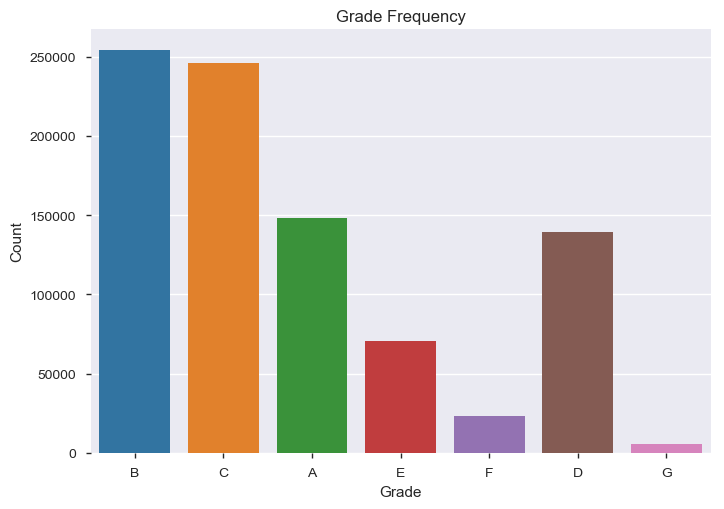

In [151]:
gradecount = sns.countplot(df["grade"])
gradecount.set(title="Grade Frequency", xlabel="Grade", ylabel="Count")
fig = gradecount.get_figure()
fig.savefig("grade_frequency.png")

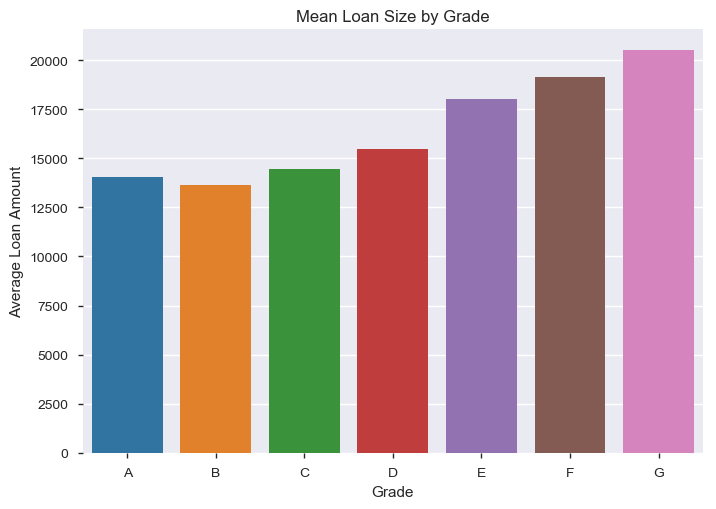

In [152]:
grades = df.groupby("grade").mean().reset_index()
amt_v_grade = sns.barplot(x="grade", y="loan_amnt", data=grades)
amt_v_grade.set(title="Mean Loan Size by Grade", xlabel="Grade", ylabel="Average Loan Amount")
fig = amt_v_grade.get_figure()
fig.savefig("loan_size_by_grade.png")

Judging by these plots, higher value loans are less frequently issued, as well as deemed more risky.

##### "int_rate" column

We will visualize the relationship between interest rate and grade, using a violin plot, which performs the same function as a box-and-whisker plot, but also visually displays probability density.

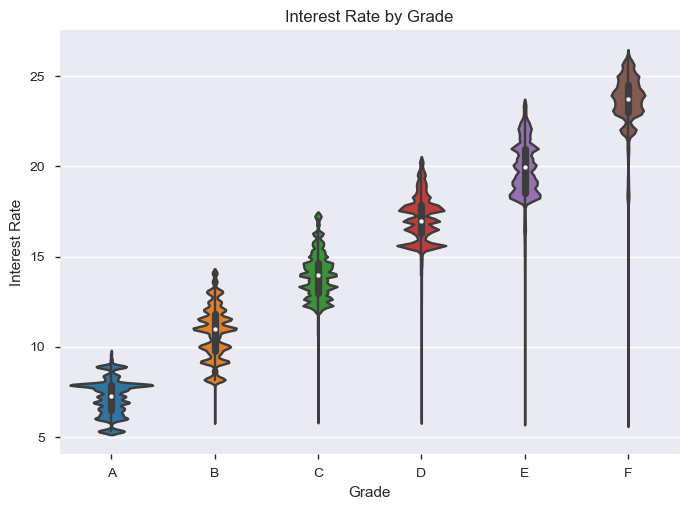

In [154]:
rate_v_grade = sns.violinplot(x="grade", y="int_rate", data=df, order="ABCDEF")
rate_v_grade.set(title="Interest Rate by Grade", xlabel="Grade", ylabel="Interest Rate")
fig = rate_v_grade.get_figure()
fig.savefig("interest_rate_by_grade.png")

From our plot, we can see that -- generally speaking -- interest rate increases with higher risk grades. It is worth noting, however, that there are examples of each grade which have lower interest rates than is typical.

##### "issue_d" column

In [156]:
df["issue_d"].unique()

array(['Dec-2011', 'Nov-2011', 'Oct-2011', 'Sep-2011', 'Aug-2011',
       'Jul-2011', 'Jun-2011', 'May-2011', 'Apr-2011', 'Mar-2011',
       'Feb-2011', 'Jan-2011', 'Dec-2010', 'Nov-2010', 'Oct-2010',
       'Sep-2010', 'Aug-2010', 'Jul-2010', 'Jun-2010', 'May-2010',
       'Apr-2010', 'Mar-2010', 'Feb-2010', 'Jan-2010', 'Dec-2009',
       'Nov-2009', 'Oct-2009', 'Sep-2009', 'Aug-2009', 'Jul-2009',
       'Jun-2009', 'May-2009', 'Apr-2009', 'Mar-2009', 'Feb-2009',
       'Jan-2009', 'Dec-2008', 'Nov-2008', 'Oct-2008', 'Sep-2008',
       'Aug-2008', 'Jul-2008', 'Jun-2008', 'May-2008', 'Apr-2008',
       'Mar-2008', 'Feb-2008', 'Jan-2008', 'Dec-2007', 'Nov-2007',
       'Oct-2007', 'Sep-2007', 'Aug-2007', 'Jul-2007', 'Jun-2007',
       'Dec-2013', 'Nov-2013', 'Oct-2013', 'Sep-2013', 'Aug-2013',
       'Jul-2013', 'Jun-2013', 'May-2013', 'Apr-2013', 'Mar-2013',
       'Feb-2013', 'Jan-2013', 'Dec-2012', 'Nov-2012', 'Oct-2012',
       'Sep-2012', 'Aug-2012', 'Jul-2012', 'Jun-2012', 'May-20

We can tell that there are no misformatted entries in this column, and can now reformat to datetime, into a new column "issued_dt". Anticipating the need to groupby year and grade in section 2, we will also add a column called "issued_yr".

In [157]:
df['issued_dt'] = pd.to_datetime(df['issue_d'])
df['issued_yr'] = df['issued_dt'].dt.year
df.head()

,loan_amnt,funded_amnt,term,int_rate,grade,annual_inc,issue_d,dti,revol_bal,total_pymnt,loan_status,issued_dt,issued_yr
0,5000.0,5000.0,36 months,10.65,B,24000.0,Dec-2011,27.65,13648.0,5861.07,Fully Paid,2011-12-01,2011
1,2500.0,2500.0,60 months,15.27,C,30000.0,Dec-2011,1.00,1687.0,1008.71,Charged Off,2011-12-01,2011
2,2400.0,2400.0,36 months,15.96,C,12252.0,Dec-2011,8.72,2956.0,3003.65,Fully Paid,2011-12-01,2011
3,10000.0,10000.0,36 months,13.49,C,49200.0,Dec-2011,20.00,5598.0,12226.30,Fully Paid,2011-12-01,2011
4,3000.0,3000.0,60 months,12.69,B,80000.0,Dec-2011,17.94,27783.0,3242.17,Current,2011-12-01,2011


##### "revol_bal" column

We will review zero values and the largest values in the "revol_bal" column, looking for rows that might need to be dropped.

In [159]:
zero_revol_bal = df[df["revol_bal"] == 0]
zero_revol_bal

,loan_amnt,funded_amnt,term,int_rate,grade,annual_inc,issue_d,dti,revol_bal,total_pymnt,loan_status,issued_dt,issued_yr
18,6000.0,6000.0,36 months,11.71,B,84000.0,Dec-2011,18.44,0.0,7164.50,Fully Paid,2011-12-01,2011
966,8075.0,8075.0,60 months,22.35,F,35000.0,Dec-2011,10.73,0.0,8226.30,Fully Paid,2011-12-01,2011
1106,20500.0,12625.0,60 months,20.89,F,54000.0,Dec-2011,18.02,0.0,16341.36,Current,2011-12-01,2011
1247,15000.0,15000.0,36 months,7.90,A,125000.0,Dec-2011,10.64,0.0,16894.90,Fully Paid,2011-12-01,2011
1249,13475.0,13475.0,60 months,8.90,A,26400.0,Dec-2011,27.27,0.0,13643.23,Current,2011-12-01,2011
1404,8000.0,8000.0,36 months,9.91,B,60000.0,Dec-2011,19.90,0.0,4387.49,Charged Off,2011-12-01,2011
1423,3800.0,3800.0,36 months,6.03,A,90000.0,Dec-2011,21.32,0.0,4104.10,Fully Paid,2011-12-01,2011
1525,23000.0,23000.0,60 months,19.91,E,45600.0,Dec-2011,18.68,0.0,9632.66,Charged Off,2011-12-01,2011
1545,7500.0,7500.0,36 months,7.90,A,42500.0,Dec-2011,4.26,0.0,7799.31,Fully Paid,2011-12-01,2011
1590,6500.0,6500.0,36 months,14.27,C,48500.0,Dec-2011,11.36,0.0,7995.33,Fully Paid,2011-12-01,2011


In [160]:
high_revol_bal = df.sort_values("revol_bal", ascending = False)
high_revol_bal.head(100)

,loan_amnt,funded_amnt,term,int_rate,grade,annual_inc,issue_d,dti,revol_bal,total_pymnt,loan_status,issued_dt,issued_yr
755746,35000.0,35000.0,36 months,16.55,D,400000.0,Jun-2015,24.83,2904836.0,8715.95,Current,2015-06-01,2015
129958,28000.0,28000.0,36 months,8.90,A,1000000.0,Jun-2013,12.54,2568995.0,27557.23,Current,2013-06-01,2013
301370,26200.0,26200.0,36 months,7.69,A,999999.0,Oct-2014,13.30,2560703.0,12259.20,Current,2014-10-01,2014
60570,35000.0,35000.0,36 months,14.30,C,400000.0,Nov-2013,32.80,1746716.0,34268.40,Charged Off,2013-11-01,2013
178261,35000.0,35000.0,36 months,11.14,B,400000.0,Jan-2013,33.48,1743266.0,35951.80,Fully Paid,2013-01-01,2013
629047,30625.0,30625.0,60 months,16.55,D,950000.0,Aug-2015,25.63,1630818.0,2958.56,Current,2015-08-01,2015
232762,35000.0,35000.0,60 months,11.44,B,900000.0,Dec-2014,9.76,1298783.0,9313.16,Current,2014-12-01,2014
40698,24000.0,24000.0,36 months,14.96,D,350000.0,Feb-2010,11.38,1207359.0,2693.64,Does not meet the credit policy. Status:Charge...,2010-02-01,2010
395427,31500.0,31500.0,36 months,14.16,C,275000.0,May-2014,9.84,1190046.0,25732.40,Current,2014-05-01,2014
833507,28000.0,28000.0,36 months,6.92,A,350000.0,Feb-2015,18.25,1043860.0,9477.41,Current,2015-02-01,2015


Neither the zero values nor the large values for revolving balance appear to be unusual upon scanning their containing rows. We will leave them present in the data.

##### "term" column

Remove the first character, which is a space, from each row of the "term" column.

In [162]:
df["term"] = df["term"].str[1:]

***

## Business Analysis

#### We are interested in evaluating whether the 36 month term loans would make for a good investment. Please investigate the following. Assume a 36 month investment period for each loan, and exclude loans with less than 36 months of data available.

According to the description on Kaggle, the data extends through the previous financial quarter prior to publishing. Since December 2015 is the latest entry for both issued and fully paid loans, we will assume that these loans were simply issued and paid off (possibly refinanced) in the same month. Given this assumption, in order to observe only loans for which 36 months of data exist, we will drop all loans issued after December 2012. Additionally, since we are evaluating only 36 month term loans as a possible investment, we will drop all loans of 60 month term.

In [163]:
fully_paid = df[df["loan_status"]=="Fully Paid"]
fully_paid.sort_values(by=["issued_dt"], ascending=False)

,loan_amnt,funded_amnt,term,int_rate,grade,annual_inc,issue_d,dti,revol_bal,total_pymnt,loan_status,issued_dt,issued_yr
499186,15000.0,15000.0,36 months,7.89,A,140000.0,Dec-2015,13.94,113394.0,15115.07,Fully Paid,2015-12-01,2015
498724,3500.0,3500.0,36 months,13.18,C,25000.0,Dec-2015,35.72,2934.0,115.68,Fully Paid,2015-12-01,2015
500578,8000.0,8000.0,36 months,11.99,C,100000.0,Dec-2015,9.14,12769.0,8092.83,Fully Paid,2015-12-01,2015
500525,10900.0,10900.0,36 months,13.18,C,94000.0,Dec-2015,14.06,10895.0,10970.51,Fully Paid,2015-12-01,2015
500379,20975.0,20975.0,60 months,20.99,E,47700.0,Dec-2015,28.55,12743.0,21060.61,Fully Paid,2015-12-01,2015
499789,15000.0,15000.0,36 months,11.99,C,54000.0,Dec-2015,18.82,29199.0,15207.98,Fully Paid,2015-12-01,2015
499739,8400.0,8400.0,36 months,16.99,D,105000.0,Dec-2015,12.77,35914.0,8534.11,Fully Paid,2015-12-01,2015
499496,1500.0,1500.0,36 months,13.67,C,75000.0,Dec-2015,11.51,14444.0,49.89,Fully Paid,2015-12-01,2015
499374,13000.0,13000.0,60 months,9.76,B,50000.0,Dec-2015,14.09,985.0,302.87,Fully Paid,2015-12-01,2015
499277,8000.0,8000.0,36 months,9.17,B,67000.0,Dec-2015,20.16,15247.0,8002.45,Fully Paid,2015-12-01,2015


In [164]:
df.sort_values(by=['issued_dt'], ascending=False)

,loan_amnt,funded_amnt,term,int_rate,grade,annual_inc,issue_d,dti,revol_bal,total_pymnt,loan_status,issued_dt,issued_yr
500771,8000.0,8000.0,36 months,9.17,B,260000.0,Dec-2015,13.72,24491.0,250.96,Current,2015-12-01,2015
481038,8500.0,8500.0,36 months,16.99,D,36000.0,Dec-2015,19.33,958.0,286.96,Current,2015-12-01,2015
481046,5000.0,5000.0,36 months,10.64,B,35360.0,Dec-2015,5.53,2642.0,156.94,Current,2015-12-01,2015
481045,2000.0,2000.0,36 months,19.99,E,34000.0,Dec-2015,34.45,3662.0,69.88,Current,2015-12-01,2015
481044,17000.0,17000.0,60 months,12.59,C,220000.0,Dec-2015,15.40,130416.0,0.00,Current,2015-12-01,2015
481043,8975.0,8975.0,36 months,13.67,C,20424.0,Dec-2015,11.28,9867.0,0.00,Current,2015-12-01,2015
481042,22000.0,22000.0,60 months,13.67,C,65000.0,Dec-2015,14.36,18196.0,474.73,Current,2015-12-01,2015
481041,13300.0,13300.0,36 months,7.26,A,69200.0,Dec-2015,7.25,18023.0,0.00,Current,2015-12-01,2015
481040,17500.0,17500.0,60 months,7.26,A,130000.0,Dec-2015,13.88,11909.0,334.56,Current,2015-12-01,2015
481039,24000.0,24000.0,36 months,20.99,E,185000.0,Dec-2015,20.23,15307.0,0.00,Current,2015-12-01,2015


In [165]:
df["term"].unique()

array(['36 months', '60 months'], dtype=object)

In [166]:
term_36 = df[df["term"]=="36 months"]

In [101]:
term_36.head(50)

,loan_amnt,funded_amnt,term,int_rate,grade,annual_inc,issue_d,dti,revol_bal,total_pymnt,loan_status,period,issued_dt,issued_yr
0,5000.0,5000.0,36 months,10.65,B,24000.00,Dec-2011,27.65,13648.0,5861.07,Fully Paid,2011-12-01,2011-12-01,2011
2,2400.0,2400.0,36 months,15.96,C,12252.00,Dec-2011,8.72,2956.0,3003.65,Fully Paid,2011-12-01,2011-12-01,2011
3,10000.0,10000.0,36 months,13.49,C,49200.00,Dec-2011,20.00,5598.0,12226.30,Fully Paid,2011-12-01,2011-12-01,2011
5,5000.0,5000.0,36 months,7.90,A,36000.00,Dec-2011,11.20,7963.0,5631.38,Fully Paid,2011-12-01,2011-12-01,2011
7,3000.0,3000.0,36 months,18.64,E,48000.00,Dec-2011,5.35,8221.0,3938.14,Fully Paid,2011-12-01,2011-12-01,2011
11,12000.0,12000.0,36 months,12.69,B,75000.00,Dec-2011,10.78,23336.0,13943.08,Fully Paid,2011-12-01,2011-12-01,2011
12,9000.0,9000.0,36 months,13.49,C,30000.00,Dec-2011,10.08,10452.0,2270.70,Charged Off,2011-12-01,2011-12-01,2011
13,3000.0,3000.0,36 months,9.91,B,15000.00,Dec-2011,12.56,7323.0,3478.98,Fully Paid,2011-12-01,2011-12-01,2011
14,10000.0,10000.0,36 months,10.65,B,100000.00,Dec-2011,7.06,11997.0,7471.99,Charged Off,2011-12-01,2011-12-01,2011
15,1000.0,1000.0,36 months,16.29,D,28000.00,Dec-2011,20.31,6524.0,1270.17,Fully Paid,2011-12-01,2011-12-01,2011


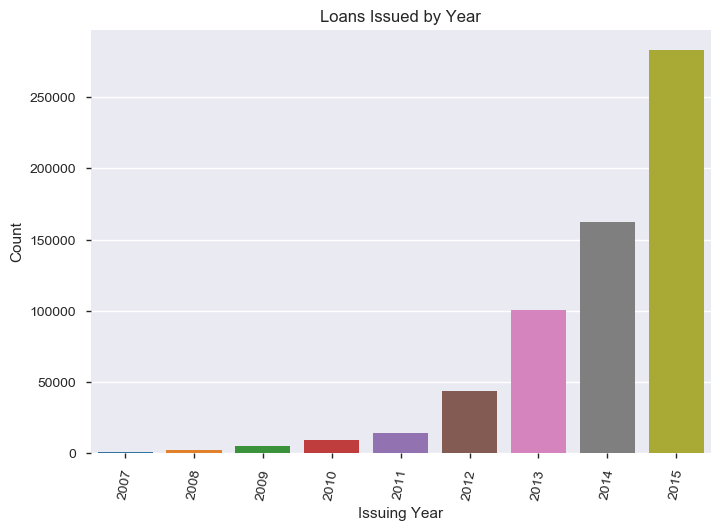

In [167]:
date_issued = sns.countplot(term_36["issued_yr"])
sns.set(rc={'figure.figsize':(20,20)})
date_issued.set(title="Loans Issued by Year", xlabel="Issuing Year", ylabel="Count")
plt.xticks(rotation=80)
fig = date_issued.get_figure()
fig.savefig("loans_issued_by_year.png")

#### What percentage of loans has been fully paid? (given the aforementioned excluded loans)

In [168]:
df["loan_status"].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off', 'Issued'],
      dtype=object)

In [169]:
term_36_dec12 = term_36[term_36["issued_yr"] < 2013]

In [170]:
term_36_dec12.count()

loan_amnt      75000
funded_amnt    75000
term           75000
int_rate       75000
grade          75000
annual_inc     75000
issue_d        75000
dti            75000
revol_bal      75000
total_pymnt    75000
loan_status    75000
issued_dt      75000
issued_yr      75000
dtype: int64

We now have a dataset of loans with at least 36 months of data each, of 36 month term. There are 75,004 samples. Next we will filter these by "loan_status" for the two categories that represent a fully paid loan.

In [171]:
fully_paid = ['Fully Paid', 'Does not meet the credit policy. Status:Fully Paid']

In [172]:
term_36_dec12_fp = term_36_dec12[term_36_dec12["loan_status"].isin(fully_paid)]
term_36_dec12_fp

,loan_amnt,funded_amnt,term,int_rate,grade,annual_inc,issue_d,dti,revol_bal,total_pymnt,loan_status,issued_dt,issued_yr
0,5000.0,5000.0,36 months,10.65,B,24000.00,Dec-2011,27.65,13648.0,5861.07,Fully Paid,2011-12-01,2011
2,2400.0,2400.0,36 months,15.96,C,12252.00,Dec-2011,8.72,2956.0,3003.65,Fully Paid,2011-12-01,2011
3,10000.0,10000.0,36 months,13.49,C,49200.00,Dec-2011,20.00,5598.0,12226.30,Fully Paid,2011-12-01,2011
5,5000.0,5000.0,36 months,7.90,A,36000.00,Dec-2011,11.20,7963.0,5631.38,Fully Paid,2011-12-01,2011
7,3000.0,3000.0,36 months,18.64,E,48000.00,Dec-2011,5.35,8221.0,3938.14,Fully Paid,2011-12-01,2011
11,12000.0,12000.0,36 months,12.69,B,75000.00,Dec-2011,10.78,23336.0,13943.08,Fully Paid,2011-12-01,2011
13,3000.0,3000.0,36 months,9.91,B,15000.00,Dec-2011,12.56,7323.0,3478.98,Fully Paid,2011-12-01,2011
15,1000.0,1000.0,36 months,16.29,D,28000.00,Dec-2011,20.31,6524.0,1270.17,Fully Paid,2011-12-01,2011
16,10000.0,10000.0,36 months,15.27,C,42000.00,Dec-2011,18.60,24043.0,12519.26,Fully Paid,2011-12-01,2011
17,3600.0,3600.0,36 months,6.03,A,110000.00,Dec-2011,10.52,22836.0,3785.02,Fully Paid,2011-12-01,2011


In [173]:
percent_fp = len(term_36_dec12_fp.index)/len(term_36_dec12.index)
print(percent_fp)

0.86856


In [181]:
len(term_36_dec12_fp.index)

65142

In [182]:
len(term_36_dec12.index)

75000

86.9% of the loans that meet our filtering criteria are considered "fully paid". (N.B. please see above assumption on interpretation of instructions)

#### When bucketed by year of origination and grade, which cohort has the highest rate of defaults? Here you may assume that any loan which was not fully paid had “defaulted”.

In [174]:
defaulted = ['Charged Off', 'Current', 'Default','Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)', 'Does not meet the credit policy. Status:Charged Off', 'Issued']

In [175]:
term_36_dec12["defaulted"] = np.where(term_36_dec12['loan_status'].isin(defaulted), 1, 0)

In [176]:
term_36_dec12.head(100)

,loan_amnt,funded_amnt,term,int_rate,grade,annual_inc,issue_d,dti,revol_bal,total_pymnt,loan_status,issued_dt,issued_yr,defaulted
0,5000.0,5000.0,36 months,10.65,B,24000.00,Dec-2011,27.65,13648.0,5861.07,Fully Paid,2011-12-01,2011,0
2,2400.0,2400.0,36 months,15.96,C,12252.00,Dec-2011,8.72,2956.0,3003.65,Fully Paid,2011-12-01,2011,0
3,10000.0,10000.0,36 months,13.49,C,49200.00,Dec-2011,20.00,5598.0,12226.30,Fully Paid,2011-12-01,2011,0
5,5000.0,5000.0,36 months,7.90,A,36000.00,Dec-2011,11.20,7963.0,5631.38,Fully Paid,2011-12-01,2011,0
7,3000.0,3000.0,36 months,18.64,E,48000.00,Dec-2011,5.35,8221.0,3938.14,Fully Paid,2011-12-01,2011,0
11,12000.0,12000.0,36 months,12.69,B,75000.00,Dec-2011,10.78,23336.0,13943.08,Fully Paid,2011-12-01,2011,0
12,9000.0,9000.0,36 months,13.49,C,30000.00,Dec-2011,10.08,10452.0,2270.70,Charged Off,2011-12-01,2011,1
13,3000.0,3000.0,36 months,9.91,B,15000.00,Dec-2011,12.56,7323.0,3478.98,Fully Paid,2011-12-01,2011,0
14,10000.0,10000.0,36 months,10.65,B,100000.00,Dec-2011,7.06,11997.0,7471.99,Charged Off,2011-12-01,2011,1
15,1000.0,1000.0,36 months,16.29,D,28000.00,Dec-2011,20.31,6524.0,1270.17,Fully Paid,2011-12-01,2011,0


In [177]:
default_rates = term_36_dec12.groupby(["grade", "issued_yr"])["defaulted"].mean().reset_index()
default_rates.sort_values("defaulted", ascending = False)

,grade,issued_yr,defaulted
36,G,2007,0.485714
30,F,2007,0.480769
40,G,2011,0.400000
39,G,2010,0.352941
31,F,2008,0.342342
38,G,2009,0.327273
37,G,2008,0.325581
18,D,2007,0.313131
24,E,2007,0.310000
33,F,2010,0.296703


The cohort with the highest default rate was 2007's G-grade cohort, with a 48.6% default rate. Intuitively, this makes sense, as 2007 is the earliest year represented in the data, and G is the riskiest note grade available. (N.B. this finding is contingent upon the assumed interpretation of "default" and 36 month loan with 36 months of data available. See above for further explanation.)

#### When bucketed by year of origination and grade, what annualized rate of return have these loans generated on average?

$$arr = \frac{total\_pymnt}{funded\_amnt}^{1/3}-1$$

In [178]:
term_36_dec12["arr"] = (term_36_dec12["total_pymnt"]/term_36_dec12["funded_amnt"])**(1.0/3.0) - 1

In [179]:
arr_average = term_36_dec12.groupby(["grade", "issued_yr"])["arr"].mean().reset_index()
arr_average.sort_values("arr", ascending = True)

,grade,issued_yr,arr
30,F,2007,-0.079863
31,F,2008,-0.045138
36,G,2007,-0.044102
40,G,2011,-0.020399
19,D,2008,-0.018365
24,E,2007,-0.015099
18,D,2007,-0.014353
12,C,2007,-0.008031
37,G,2008,-0.007913
33,F,2010,-0.007814


On Average, G grade notes from 2007 have generated -7.99% ARR.

***

## Modeling

#### Please build a logistic regression model to predict loan defaults (as defined above) that could help avoid investing in such loans. Assume that (i) you are given the ability to invest in each loan independently; (ii) you invest immediately following loan origination and hold to maturity (36 months); and (iii) all loan fields that would be known upon origination are made available to you. 

In [209]:
model_df = term_36_dec12

In [210]:
model_df

,funded_amnt,int_rate,grade,annual_inc,dti,revol_bal,total_pymnt,issued_dt,defaulted
0,5000.0,10.65,B,24000.00,27.65,13648.0,5861.07,2011-12-01,0
1,2400.0,15.96,C,12252.00,8.72,2956.0,3003.65,2011-12-01,0
2,10000.0,13.49,C,49200.00,20.00,5598.0,12226.30,2011-12-01,0
3,5000.0,7.90,A,36000.00,11.20,7963.0,5631.38,2011-12-01,0
4,3000.0,18.64,E,48000.00,5.35,8221.0,3938.14,2011-12-01,0
5,12000.0,12.69,B,75000.00,10.78,23336.0,13943.08,2011-12-01,0
6,9000.0,13.49,C,30000.00,10.08,10452.0,2270.70,2011-12-01,1
7,3000.0,9.91,B,15000.00,12.56,7323.0,3478.98,2011-12-01,0
8,10000.0,10.65,B,100000.00,7.06,11997.0,7471.99,2011-12-01,1
9,1000.0,16.29,D,28000.00,20.31,6524.0,1270.17,2011-12-01,0


According to our filtering criteria (based on assumed correct interpretation of instructions, please see above for further explanation), we have a dataset on which to train our binary classifier that consists of:

- 75,000 total samples
- 9,858 (13.1%) of which are considered defaulted (positive results, in this case)
- 65,142 (86.9%) of which are fully paid (negative results, in this case)

Because the two classes are imbalanced, we should sample

First, we will drop all non-meaningful or redundant columns from our considered training data. In this case, we will drop the following columns:
- "term": we have already excluded all 60 month term loans, so this column is now meaningless.
- "issue_d" and "issued_yr": these were useful during exploratory analysis, but are redundant at this time given that these data are represented as datetime objects in column "issued_dt".
- "loan_status": we have compressed these labels into a binary outcome of default (1) or fully paid (0) in the "defaulted" column. Since these are the labels our model will use to train, we will keep them represented in a single column so that we can easily separate them from the training data.
- "loan_amnt": this is highly collinear with "funded_amnt".

According to our earlier exploration, the remaining variables should be predictive (to varying degrees) of a default.

In [211]:
drop_cols = ['loan_amnt','term', 'issue_d', 'loan_status', 'issued_yr', 'arr']
model_df = model_df.drop(model_df[drop_cols], axis=1)
model_df.head(10)

KeyError: "['loan_amnt' 'term' 'issue_d' 'loan_status' 'issued_yr' 'arr'] not in index"

In [191]:
model_df.reset_index(inplace=True)
model_df.head()

,index,loan_amnt,funded_amnt,int_rate,grade,annual_inc,dti,revol_bal,total_pymnt,issued_dt,defaulted
0,0,5000.0,5000.0,10.65,B,24000.0,27.65,13648.0,5861.07,2011-12-01,0
1,2,2400.0,2400.0,15.96,C,12252.0,8.72,2956.0,3003.65,2011-12-01,0
2,3,10000.0,10000.0,13.49,C,49200.0,20.00,5598.0,12226.30,2011-12-01,0
3,5,5000.0,5000.0,7.90,A,36000.0,11.20,7963.0,5631.38,2011-12-01,0
4,7,3000.0,3000.0,18.64,E,48000.0,5.35,8221.0,3938.14,2011-12-01,0


In [198]:
model_df.drop(model_df['loan_amnt','index'])
model_df

KeyError: ('loan_amnt', 'index')

In [213]:
data = model_df.copy()

In [214]:
len(data)

75000

Then, we will standardize the data of our numerical columns.

In [219]:
labels = data['defaulted']

In [223]:
data["issued_dt"]=data["issued_dt"].apply(lambda x: x.toordinal())
data.head(5)

,funded_amnt,int_rate,grade,annual_inc,dti,revol_bal,total_pymnt,issued_dt,defaulted
0,5000.0,10.65,B,24000.0,27.65,13648.0,5861.07,734472,0
1,2400.0,15.96,C,12252.0,8.72,2956.0,3003.65,734472,0
2,10000.0,13.49,C,49200.0,20.00,5598.0,12226.30,734472,0
3,5000.0,7.90,A,36000.0,11.20,7963.0,5631.38,734472,0
4,3000.0,18.64,E,48000.0,5.35,8221.0,3938.14,734472,0


In [226]:
data['grade']= [ord(x) for x in data['grade']]
data.head(5)

,funded_amnt,int_rate,grade,annual_inc,dti,revol_bal,total_pymnt,issued_dt,defaulted
0,5000.0,10.65,66,24000.0,27.65,13648.0,5861.07,734472,0
1,2400.0,15.96,67,12252.0,8.72,2956.0,3003.65,734472,0
2,10000.0,13.49,67,49200.0,20.00,5598.0,12226.30,734472,0
3,5000.0,7.90,65,36000.0,11.20,7963.0,5631.38,734472,0
4,3000.0,18.64,69,48000.0,5.35,8221.0,3938.14,734472,0


In [234]:
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(data)
scaled_df = pd.DataFrame(scaled_df)

In [ ]:
sc

In [230]:
scaled_df.head()

,0,1,2,3,4,5,6,7,8
0,0.130435,0.268618,0.166667,0.003096,0.790226,0.011304,0.117271,0.81791,0.0
1,0.055072,0.541346,0.333333,0.001450,0.249214,0.002448,0.060099,0.81791,0.0
2,0.275362,0.414484,0.333333,0.006625,0.571592,0.004637,0.244630,0.81791,0.0
3,0.130435,0.127375,0.000000,0.004777,0.320091,0.006595,0.112676,0.81791,0.0
4,0.072464,0.678993,0.666667,0.006457,0.152901,0.006809,0.078796,0.81791,0.0


In [235]:
scaled_df.shape

(75000, 9)

In [241]:
scaled_df[8]

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
5        0.0
6        1.0
7        0.0
8        1.0
9        0.0
10       0.0
11       0.0
12       0.0
13       0.0
14       1.0
15       0.0
16       0.0
17       1.0
18       0.0
19       1.0
20       0.0
21       0.0
22       0.0
23       0.0
24       0.0
25       0.0
26       0.0
27       0.0
28       0.0
29       0.0
        ... 
74970    0.0
74971    0.0
74972    0.0
74973    0.0
74974    0.0
74975    0.0
74976    0.0
74977    0.0
74978    0.0
74979    0.0
74980    0.0
74981    1.0
74982    0.0
74983    0.0
74984    0.0
74985    0.0
74986    0.0
74987    0.0
74988    0.0
74989    0.0
74990    0.0
74991    0.0
74992    0.0
74993    0.0
74994    0.0
74995    0.0
74996    0.0
74997    0.0
74998    0.0
74999    1.0
Name: 8, Length: 75000, dtype: float64

In [239]:
X = scaled_df[0:7]
y = labels
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)
print(X_train.shape)
print(X_test.shape)

ValueError: Found input variables with inconsistent numbers of samples: [7, 75000]

In [205]:
data = data['issued_dt'].apply(lambda x: x.toordinal())
data.head()

0    734472
1    734472
2    734472
3    734472
4    734472
Name: issued_dt, dtype: int64

In [ ]:
model

#### Was the model effective? Explain how you validated your model and describe how you measure the performance of the model. 

In [ ]:
#use column effective default from above for training/test data here

In [ ]:
#comment on undersampling and uneven distribution and sample size

In [ ]:
#part 3 - logreg model to avoid investing in loans that will default

In [28]:
#assume independent investment
#assume investment immediately at origination and holding to 36 mo.s
#

In [ ]:
#steps for modeling:

#standardize

In [ ]:
#dataset is imbalanced (11% are bad loans) - repeated undersampling
#confusion matrix, print out accuracy, precision, recall, and ROC AUC score

#talk about precision-recall trade off in this case

***

## Additional Remarks

In [ ]:
#conclusions and thoughts:
#if this project had been allowed use of all columns, I hypothesize that
#joint loans would have been a crucial feature to explore

Lending club ceased offering F and G grade notes to investors as of November 7, 2017 __[according to their website](https://help.lendingclub.com/hc/en-us/articles/115014049387-Changes-to-grade-offerings-on-the-LendingClub-platform)__. In light of this fact, a more relevant model would train only on notes of grade A through E.